In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
data = 'https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv'

In [6]:
!wget $data

--2025-11-02 05:00:02--  https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.2’

CreditScoring.csv.2 100%[===================>] 178.21K  --.-KB/s    in 0.04s   

2025-11-02 05:00:04 (4.78 MB/s) - ‘CreditScoring.csv.2’ saved [182489/182489]



In [7]:
df = pd.read_csv('CreditScoring.csv')
df.head().T

,0,1,2,3,4
Status,1,1,2,1,1
Seniority,9,17,10,0,0
Home,1,1,2,1,1
Time,60,60,36,60,36
Age,30,58,46,24,26
Marital,2,3,2,1,1
Records,1,1,2,1,1
Job,3,1,3,1,1
Expenses,73,48,90,63,46
Income,129,131,200,182,107


In [8]:
df.columns = df.columns.str.lower()

In [9]:
status_values = {
    1: 'ok', 
    2: 'default', 
    0: 'unk'
}

df.status = df.status.map(status_values)

In [10]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)


In [11]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [13]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999.0, value=np.nan).max()

In [14]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,959.0,300000.0,30000.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,0.0,0.0,0.0,475.0,628.0
min,0.0,6.0,18.0,35.0,959.0,300000.0,30000.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,959.0,300000.0,30000.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,959.0,300000.0,30000.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,959.0,300000.0,30000.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [15]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [16]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [19]:
del df_train['status']
del df_val['status']
del df_test['status']

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [21]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [22]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [25]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [26]:
roc_auc_score(y_val, y_pred)

0.6360405415223656

In [27]:
t_y_pred = dt.predict_proba(X_train)[:, 1]

In [28]:
roc_auc_score(y_train, t_y_pred)

1.0

In [29]:
# Restrict tree depth

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7128278559492383

In [31]:
t_y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, t_y_pred)

0.7717970114359753

In [32]:
# figure which conditions used

In [33]:
from sklearn.tree import export_text

print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- time <= 15.00
|   |   |   |--- class: 0
|   |   |--- time >  15.00
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- seniority <= 5.50
|   |   |   |--- class: 0
|   |   |--- seniority >  5.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- price <= 1049.00
|   |   |   |--- class: 1
|   |   |--- price >  1049.00
|   |   |   |--- class: 1



In [34]:
# Figure out best decision tree parameter

for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))
    

   1 -> 0.606
   2 -> 0.669
   3 -> 0.713
   4 -> 0.719
   5 -> 0.738
   6 -> 0.747
  10 -> 0.669
  15 -> 0.635
  20 -> 0.637
None -> 0.633


In [35]:
scores = []
for d in [4,5,6,7,8,9,10,None]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
    
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
    
        print('(%4s, %3d)  -> %.3f' % (d, s, auc))
        scores.append((d, s, auc))

(   4,   1)  -> 0.719
(   4,   2)  -> 0.719
(   4,   5)  -> 0.719
(   4,  10)  -> 0.719
(   4,  15)  -> 0.717
(   4,  20)  -> 0.718
(   4, 100)  -> 0.726
(   4, 200)  -> 0.725
(   4, 500)  -> 0.674
(   5,   1)  -> 0.738
(   5,   2)  -> 0.738
(   5,   5)  -> 0.736
(   5,  10)  -> 0.735
(   5,  15)  -> 0.729
(   5,  20)  -> 0.732
(   5, 100)  -> 0.734
(   5, 200)  -> 0.735
(   5, 500)  -> 0.674
(   6,   1)  -> 0.746
(   6,   2)  -> 0.748
(   6,   5)  -> 0.744
(   6,  10)  -> 0.742
(   6,  15)  -> 0.740
(   6,  20)  -> 0.747
(   6, 100)  -> 0.747
(   6, 200)  -> 0.743
(   6, 500)  -> 0.674
(   7,   1)  -> 0.737
(   7,   2)  -> 0.725
(   7,   5)  -> 0.734
(   7,  10)  -> 0.729
(   7,  15)  -> 0.730
(   7,  20)  -> 0.740
(   7, 100)  -> 0.751
(   7, 200)  -> 0.743
(   7, 500)  -> 0.674
(   8,   1)  -> 0.710
(   8,   2)  -> 0.713
(   8,   5)  -> 0.741
(   8,  10)  -> 0.732
(   8,  15)  -> 0.729
(   8,  20)  -> 0.732
(   8, 100)  -> 0.746
(   8, 200)  -> 0.743
(   8, 500)  -> 0.674
(   9,   1

In [36]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4.0,1,0.718991
1,4.0,2,0.718991
2,4.0,5,0.718991
3,4.0,10,0.718991
4,4.0,15,0.717093


In [37]:
# df_scores.sort_values(by='auc', ascending=False)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', 
                                 columns=['max_depth'],
                                 values=['auc']) 

df_scores_pivot

auc                                                    \
max_depth              NaN      4.0       5.0       6.0       7.0       8.0    
min_samples_leaf                                                               
1                 0.627152  0.718991  0.737667  0.746219  0.737010  0.709825   
2                 0.655221  0.718991  0.737582  0.747990  0.725358  0.712767   
5                 0.690114  0.718991  0.736404  0.744481  0.733801  0.740903   
10                0.718041  0.718991  0.734864  0.741742  0.729048  0.732239   
15                0.728933  0.717093  0.729484  0.740403  0.730065  0.729039   
20                0.728866  0.718232  0.732030  0.746958  0.739628  0.731543   
100               0.745698  0.725785  0.734449  0.747297  0.750775  0.745698   
200               0.742619  0.725122  0.735306  0.742619  0.742619  0.742619   
500               0.673503  0.673503  0.673503  0.673503  0.673503  0.673503   

                                      
max_depth             9.0       10.0  
min_samples_leaf                      
1                 0.687402  0.666195  
2                 0.692705  0.691873  
5                 0.728812  0.704887  
10                0.724731  0.715825  
15                0.735735  0.731219  
20                0.729511  0.726654  
100               0.745698  0.745698  
200               0.742619  0.742619  
500               0.673503  0.673503

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

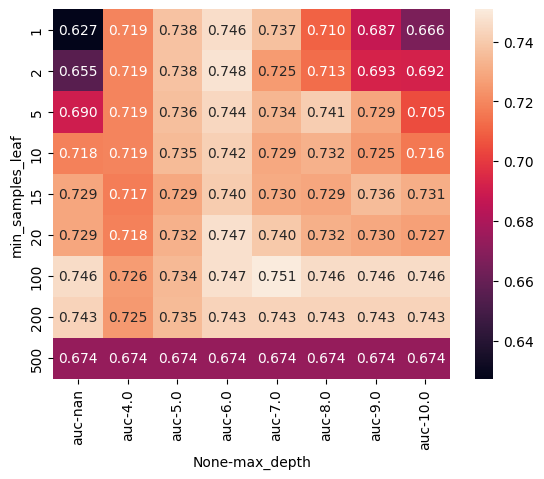

In [38]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [39]:
df_scores_pivot.columns

MultiIndex([('auc',  nan),
            ('auc',  4.0),
            ('auc',  5.0),
            ('auc',  6.0),
            ('auc',  7.0),
            ('auc',  8.0),
            ('auc',  9.0),
            ('auc', 10.0)],
           names=[None, 'max_depth'])

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
y_pred = rf.predict_proba(X_val)[:,1]

In [43]:
roc_auc_score(y_val, y_pred)

0.7589728996633649

In [44]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [45]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

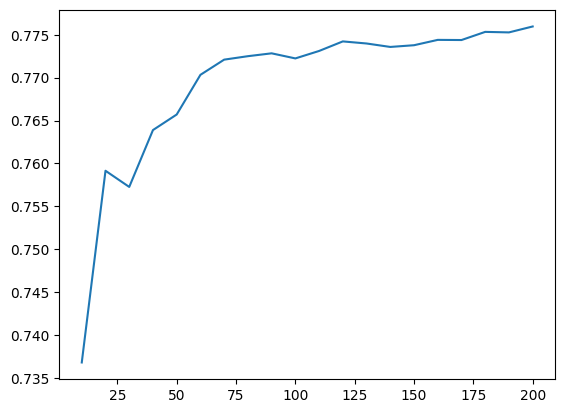

In [46]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [47]:
scores = []

for d in [5,10,15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d, 
                                    random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [48]:
df_scores = pd.DataFrame(scores, columns=['max_depth','n_estimators','auc'])
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.759663
1,5,20,0.768721
2,5,30,0.771748
3,5,40,0.774451
4,5,50,0.774291


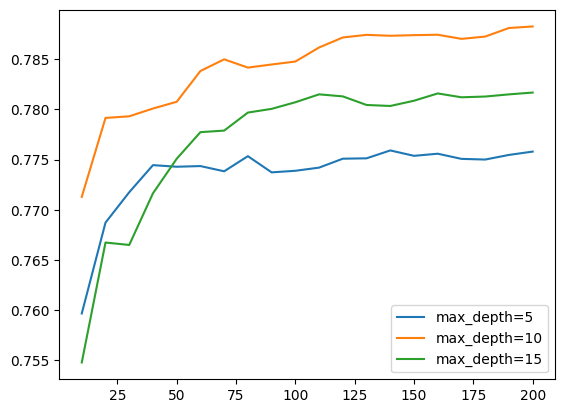

In [49]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc,
            label='max_depth=%d' % d)

plt.legend()

In [50]:
max_depth = 10

In [51]:
scores = []

for s in [1,3,5,10,15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [52]:
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf','n_estimators','auc'])
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.771285
1,1,20,0.779156
2,1,30,0.779319
3,1,40,0.780094
4,1,50,0.780766


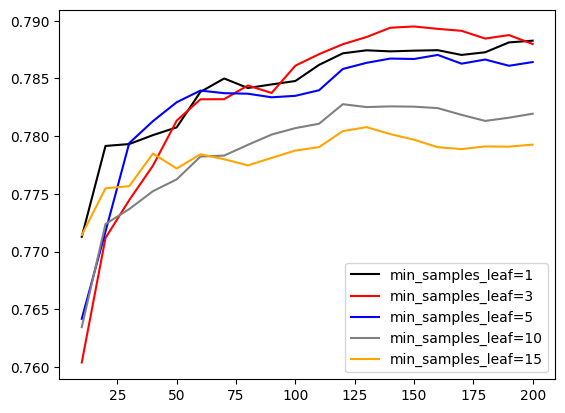

In [53]:
colors = ['black', 'red', 'blue', 'grey', 'orange']
min_samples_leaf_values = [1,3,5,10,15]
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [54]:
min_samples_leaf = 3

In [55]:
rf = RandomForestClassifier(n_estimators=100,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
 import xgboost as xgb

In [57]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [58]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'mthread': 4,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

/home/olamiko/Documents/machine-learning/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [05:03:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "mthread" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [59]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.7733495192656996

In [60]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [61]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'mthread': 4,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [62]:
s = output.stdout

In [63]:
line = s.split('\n')[0]

In [64]:
num_iter, train_auc, val_auc = line.split('\t')

In [65]:
int(num_iter.strip('[]'))

0

In [66]:
float(train_auc.split(':')[1])

0.83894

In [67]:
float(val_auc.split(':')[1])

0.74952

In [68]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [69]:
df_score = parse_xgb_output(output)

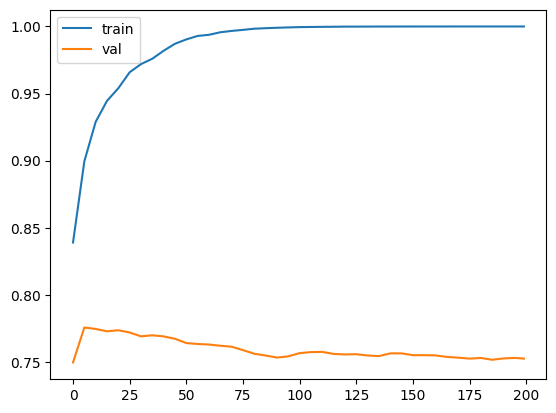

In [70]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()



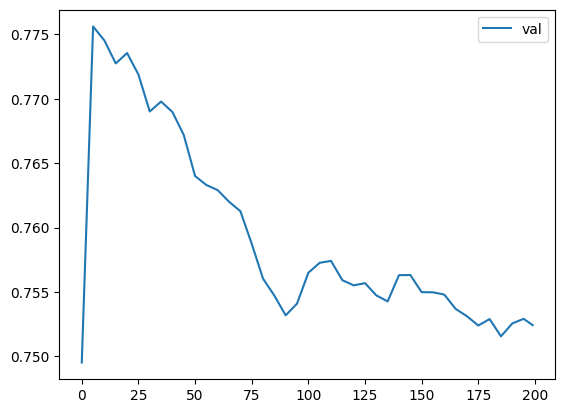

In [71]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [75]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'mthread': 4,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [76]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [77]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7399493836429245

In [78]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [80]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7879834588651281

In [82]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [85]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.7966142742970623

In [87]:
df_full_train = df_full_train.reset_index(drop=True)

In [89]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [90]:
del df_full_train['status']

In [91]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [93]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [94]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)


In [95]:
y_pred = model.predict(dtest)

In [96]:
roc_auc_score(y_test, y_pred)

0.7968574360979425